In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from kcorrect.kcorrect import Kcorrect
from lf_utils import *
from lf_ev import *


import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [2]:
df = pd.read_parquet(r"E:\PhD\Jon\SHARK\waves_deep_gals.parquet")
df=df[(df['total_ap_dust_Z_VISTA']>-999.0) & (df['zobs']<=1)]
df['SC'] = 7
df['NQ'] = 3

In [3]:
df

,id_galaxy_sky,ra,dec,zobs,zcos,inclination,pa,mstars_disk,mstars_bulge,mvir_hosthalo,...,total_ab_dust_Band3_ALMA,total_ab_dust_BandX_VLA,total_ab_dust_BandC_VLA,total_ab_dust_BandS_VLA,total_ab_dust_BandL_VLA,total_ab_dust_Band_610MHz,total_ab_dust_Band_325MHz,total_ab_dust_Band_150MHz,SC,NQ
0,3265,350.756989,-33.923721,0.588395,0.585817,68.890175,131.778320,8.345707e+09,2.120054e+10,3.476077e+12,...,-19.112677,-19.950594,-20.326777,-20.828455,-21.363056,-22.031427,-22.569828,-23.272591,7,3
1,3270,350.755951,-33.922852,0.587875,0.585816,62.644188,141.846848,4.605616e+07,1.588754e+10,3.476077e+12,...,-12.224907,-13.216760,-13.592941,-14.094620,-14.629221,-15.297593,-15.835993,-16.538755,7,3
2,3272,348.082520,-34.985603,0.580570,0.578419,53.682911,44.502815,1.128947e+07,8.872880e+09,4.115418e+11,...,-18.515173,-19.445467,-19.821650,-20.323328,-20.857929,-21.526300,-22.064701,-22.767464,7,3
3,3275,350.980164,-33.894814,0.587297,0.585086,59.386322,26.838942,2.406996e+08,3.698360e+10,1.077890e+12,...,-20.027172,-20.834003,-21.210184,-21.711863,-22.246464,-22.914835,-23.453236,-24.155998,7,3
4,3278,348.977997,-34.310123,0.587991,0.586444,15.724483,189.237732,4.484061e+06,1.050976e+10,6.535080e+11,...,-19.710293,-20.582624,-20.958805,-21.460484,-21.995085,-22.663458,-23.201857,-23.904619,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375989,35843129,345.938141,-30.317612,0.833578,0.834314,61.004955,86.400681,0.000000e+00,3.344424e+10,2.912006e+12,...,-19.368702,-20.219265,-20.595448,-21.097126,-21.631727,-22.300098,-22.838499,-23.541262,7,3
375990,35843175,343.201233,-32.280529,0.840579,0.838226,81.507042,103.734207,1.338794e+09,2.274401e+10,2.406822e+12,...,-17.926683,-18.900578,-19.276758,-19.778439,-20.313038,-20.981411,-21.519810,-22.222572,7,3
375991,35843202,343.866730,-30.794127,0.836563,0.833475,34.940994,255.186386,2.812586e+06,1.261372e+10,6.205226e+11,...,-19.363466,-20.266329,-20.642509,-21.144188,-21.678789,-22.347162,-22.885561,-23.588324,7,3
375992,35843476,347.121613,-31.806978,0.835292,0.833175,83.777840,89.561821,5.599804e+09,2.110444e+10,1.651923e+12,...,-20.540680,-21.415684,-21.791864,-22.293543,-22.828144,-23.496515,-24.034916,-24.737679,7,3


In [4]:
mag_cols = {'FUV_GALEX': 'total_ap_dust_FUV_GALEX', 
            'NUV_GALEX': 'total_ap_dust_NUV_GALEX', 
            'u_VST': 'total_ap_dust_u_VST', 
            'g_VST': 'total_ap_dust_g_VST', 
            'r_VST': 'total_ap_dust_r_VST', 
            'i_VST': 'total_ap_dust_i_VST', 
            'Z_VISTA': 'total_ap_dust_Z_VISTA', 
            'Y_VISTA': 'total_ap_dust_Y_VISTA', 
            'J_VISTA': 'total_ap_dust_J_VISTA', 
            'H_VISTA': 'total_ap_dust_H_VISTA', 
            'K_VISTA': 'total_ap_dust_K_VISTA', 
            'W1_WISE': 'total_ap_dust_W1_WISE', 
            'W2_WISE': 'total_ap_dust_W2_WISE'}
Mag_cols = {'FUV_GALEX': 'total_ab_dust_FUV_GALEX', 
            'NUV_GALEX': 'total_ab_dust_NUV_GALEX', 
            'u_VST': 'total_ab_dust_u_VST', 
            'g_VST': 'total_ab_dust_g_VST', 
            'r_VST': 'total_ab_dust_r_VST', 
            'i_VST': 'total_ab_dust_i_VST', 
            'Z_VISTA': 'total_ab_dust_Z_VISTA', 
            'Y_VISTA': 'total_ab_dust_Y_VISTA', 
            'J_VISTA': 'total_ab_dust_J_VISTA', 
            'H_VISTA': 'total_ab_dust_H_VISTA', 
            'K_VISTA': 'total_ab_dust_K_VISTA', 
            'W1_WISE': 'total_ab_dust_W1_WISE', 
            'W2_WISE': 'total_ab_dust_W2_WISE'}

cosmo = LambdaCDM(H0=67.51, Om0=0.3, Ode0=0.7)
dist_mod = 5 * np.log10(cosmo.luminosity_distance(df['zcos']).to(u.parsec).value)

fnames=[]
kcorr = []
for band in mag_cols:
    m = df[mag_cols[band]].values
    M = df[Mag_cols[band]].values
    k = m - dist_mod + 5 - M
    df[f'kcorr_{band}'] = k
    df[f'flux_{band}'] = 10**((8.9-m)/2.5)
    fnames.append(f'flux_{band}')

In [ ]:
kc = Kcorrect(responses = ['galex_FUV', 'galex_NUV', 'vst_u', 'vst_g', 'vst_r', 'vst_i', 'vista_z', 'vista_y', 'vista_j', 'vista_h', 'vista_k', 'wise_w1', 'wise_w2'])
redshift = df['zobs'].values
flux = df[fnames].values
flux_err = flux * 0.01
ivar = np.minimum(flux_err**-2, 1e30)
fix = (flux > 1e10) + (flux < -900) + (flux_err <= 0)
flux[fix] = 0
ivar[fix] = 0
coeffs = kc.fit_coeffs(redshift, flux, ivar)

ztol = 0.1
rz = df[fnames[6]]/df[fnames[6]]
bad = np.nonzero(coeffs.sum(axis=-1) == 0)[0]
good = (coeffs.sum(axis=-1) > 0)
nbad = len(bad)
if nbad > 0:
    for ibad in bad:
        print('Replacing', nbad, 'bad fits with mean')
        close = np.nonzero((abs(redshift - redshift[ibad]) < ztol) *
                            (0.9 < rz[ibad]/rz[good]) * (rz[ibad]/rz[good] < 1.1))[0]
        if len(close) > 0:
            coeffs[ibad, :] = np.mean(coeffs[close, :], axis=0)
        else:
            coeffs[ibad, :] = np.mean(coeffs[good, :], axis=0)

k = kc.kcorrect(redshift=redshift, coeffs=coeffs, band_shift=0)
for i, band in enumerate(mag_cols):
    df[f'blanton_kcorr_{band}'] = [x[i] for x in k]

c:\Users\adrie\AppData\Local\Programs\Python\Python313\Lib\site-packages\kcorrect\template.py:226: RuntimeWarning: underflow encountered in divide
  self.flux = self.restframe_flux / (1. + redshift)
C:\Users\adrie\AppData\Local\Temp\ipykernel_19156\506162263.py:5: RuntimeWarning: overflow encountered in power
  ivar = np.minimum(flux_err**-2, 1e30)


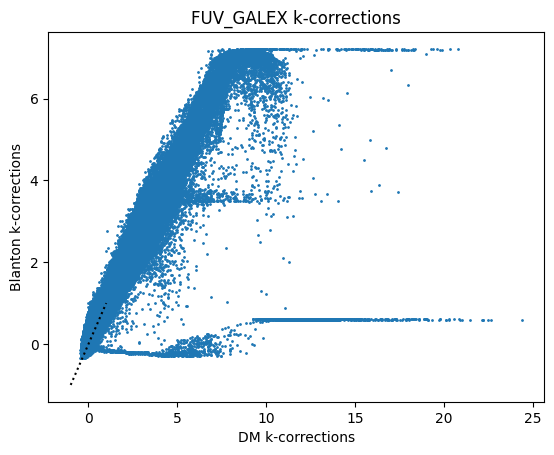

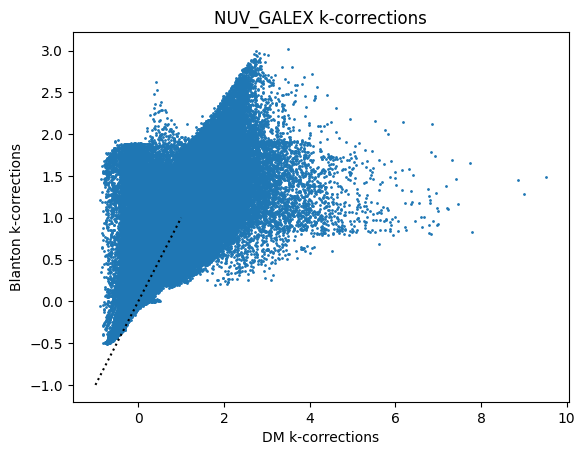

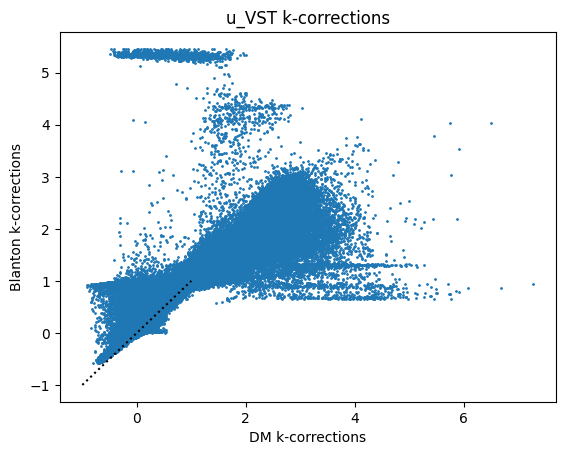

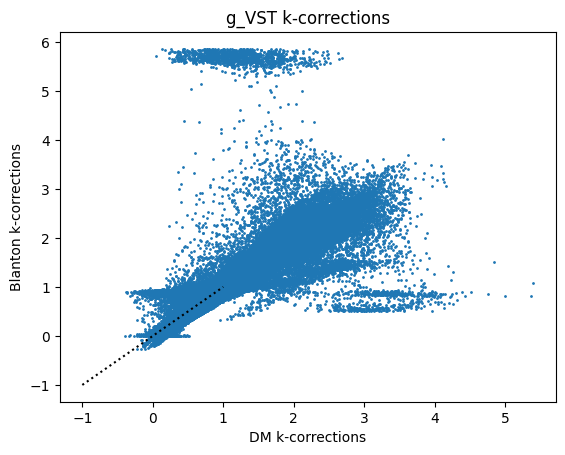

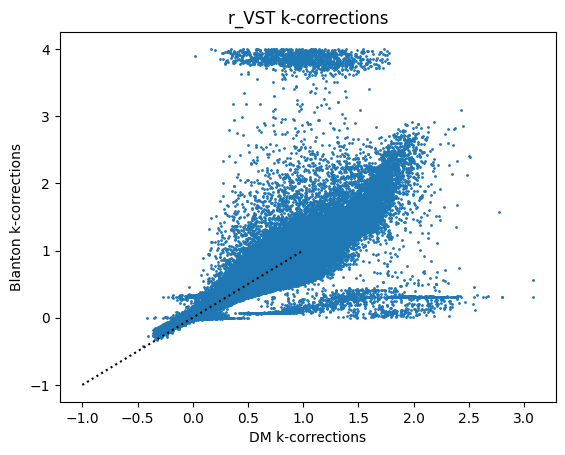

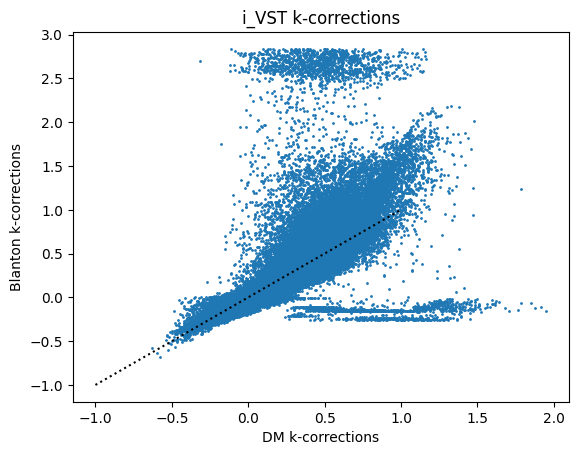

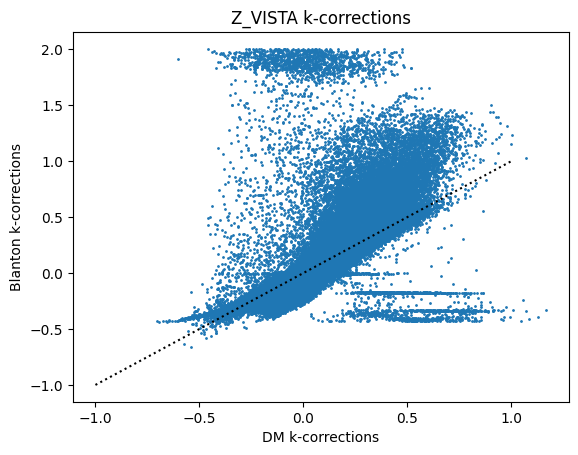

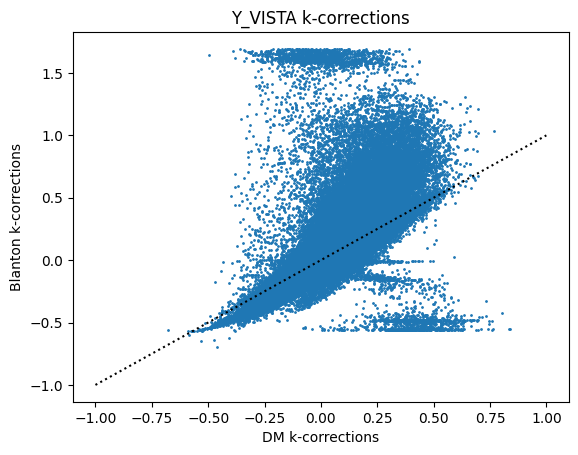

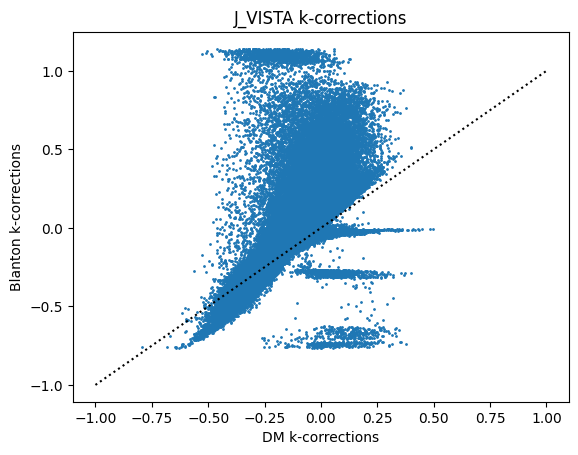

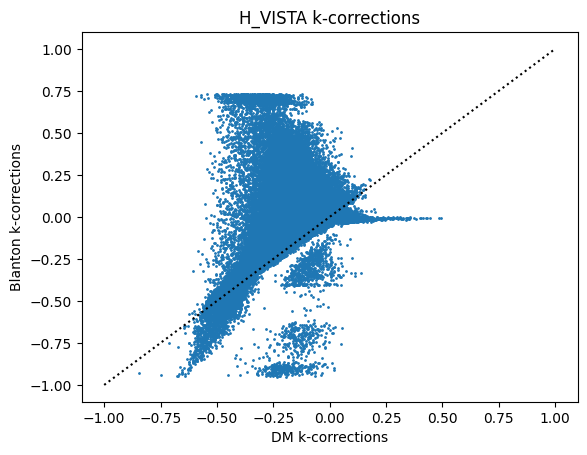

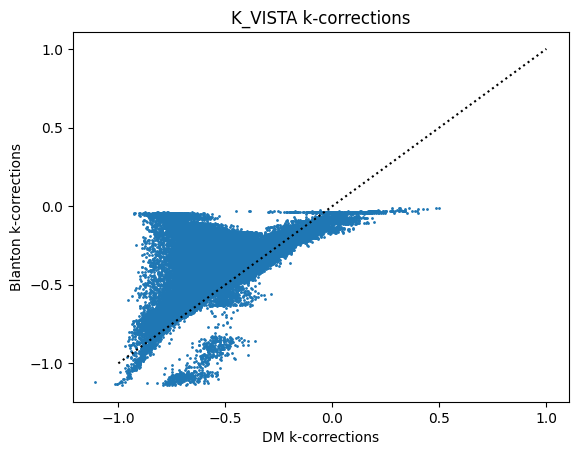

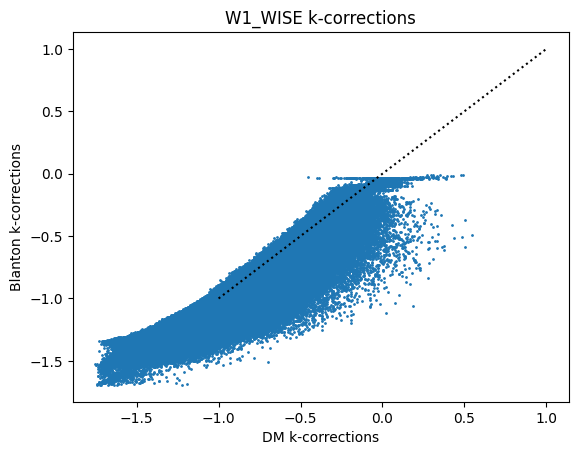

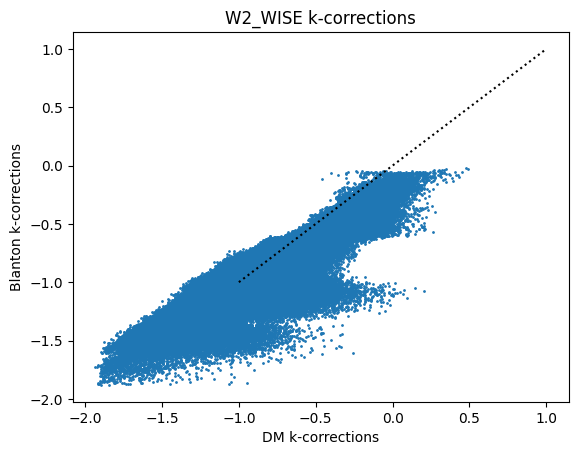

In [ ]:
for band in mag_cols:
    plt.scatter(df[f'kcorr_{band}'], df[f'blanton_kcorr_{band}'],s=1)
    plt.plot([-1, 1], [-1, 1], ':k')
    plt.xlabel('DM k-corrections')
    plt.ylabel('Blanton k-corrections')
    plt.title(f'{band} k-corrections')
    plt.show()